<a href="https://colab.research.google.com/github/ms624atyale/Scratch/blob/main/WordClouds_Demo_VOCA22withStudents_withPrintedResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)  
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'red'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'red'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis. 

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.
 


In [27]:
#@markdown 📌 Download the os module 
import os

In [16]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

In [17]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
#@markdown 📌 Get working directory. <codeline: print working directory>
%pwd

'/content'

## Now, upload your txt file on your machine!

In [29]:
#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable> 
url="https://https://raw.githubusercontent.com/ms624atyale/Scratch/main/voca2022.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..." 


os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.  

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

In [30]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

Processing voca2022.txt (1 of 1 files)


In [31]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Writing files to existing folder
Processing voca2022.txt (1 of 1 files)


In [32]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words. 

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	75
of_ADP	60
be_AUX	60
a_DET	58
to_PART	45
\_PROPN	34
sophisticated_ADJ	32
eligible_ADJ	31
Day_PROPN	31
can_AUX	31


## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [33]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [25]:
#@markdown 📌 Import the pandas package so as to handle dataframe.

import pandas as pd

In [34]:
#@markdown 📌 Generate a dateframe with tagged words (e.g., word_POS) and their frequencies. 

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

                  Tagged  Freq
0           punctual_ADJ     4
1               neat_ADJ     4
2              they_PRON     8
3                may_AUX    17
4                do_VERB    12
...                  ...   ...
2060     encampass_PROPN     1
2061  affordability_NOUN     3
2062   satisfacroty_NOUN     1
2063     acquisitio_NOUN     1
2064     subsequent_NOUN     1

[2065 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g., 
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [35]:
#@markdown 📌 Codelines to get tagged columns split into words and POS

tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

2065
['punctual', 'neat', 'they', 'may', 'do', 'it', 'because', 'there', 'be', 'logic']
['ADJ', 'ADJ', 'PRON', 'AUX', 'VERB', 'PRON', 'SCONJ', 'PRON', 'VERB', 'NOUN']


In [36]:
#@markdown 📌 Add new columns to the dataframe.

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  2065


,POS,Word,Freq
1864,X,entitle,2
841,X,enquire,1
953,X,enclose,1
1447,X,vedor,1
1467,X,invest,1


##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [37]:
#@markdown 📌 Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

253
253
253
6928
tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor tailor compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate compensate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate duplicate authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize authorize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize summarize apprehensive apprehensive 

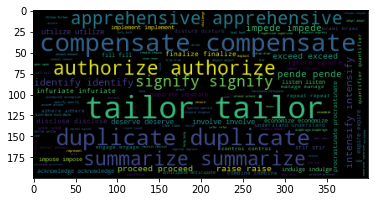

In [38]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2)) 
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV. 

## 📎 Select POS you want. 

253
       POS        Word  Freq
468   VERB      tailor    26
246   VERB  compensate    25
1287  VERB   duplicate    20
154   VERB   authorize    15
602   VERB   summarize    15
...    ...         ...   ...
1955  VERB  deaprtment     1
1964  VERB         pay     1
1995  VERB   calamitie     1
2004  VERB      redice     1
2005  VERB      reduce     1

[253 rows x 3 columns]


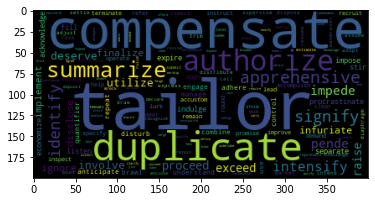

In [39]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

805
       POS          Word  Freq
174   NOUN       auction    29
165   NOUN      warranty    28
256   NOUN           day    28
400   NOUN    mastermind    28
613   NOUN        deduct    28
...    ...           ...   ...
2046  NOUN    imperative     1
2057  NOUN         carry     1
2062  NOUN  satisfacroty     1
2063  NOUN    acquisitio     1
2064  NOUN    subsequent     1

[805 rows x 3 columns]


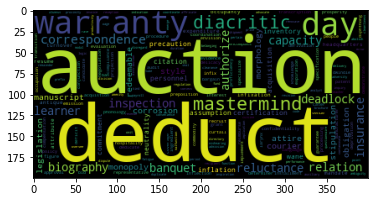

In [40]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

400
      POS           Word  Freq
168   ADJ  sophisticated    32
90    ADJ       eligible    31
331   ADJ    accountable    29
171   ADJ  procrastinate    28
172   ADJ    consecutive    28
...   ...            ...   ...
2002  ADJ        reduced     1
2007  ADJ        retaile     1
2017  ADJ           trim     1
2048  ADJ  cooperatively     1
2055  ADJ      recipient     1

[400 rows x 3 columns]


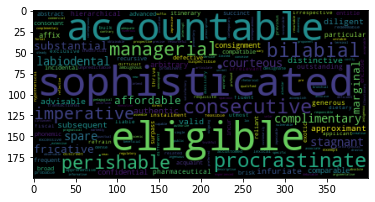

In [41]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

116
      POS                      Word  Freq
1257  ADV            electronically    23
167   ADV               exclusively    22
169   ADV                  promptly    17
285   ADV               drastically    17
1221  ADV                    adhere    17
...   ...                       ...   ...
1546  ADV                    tighly     1
1560  ADV                   besides     1
1620  ADV             conveninently     1
1775  ADV                exclusiely     1
1869  ADV  aggressivelyaggressively     1

[116 rows x 3 columns]


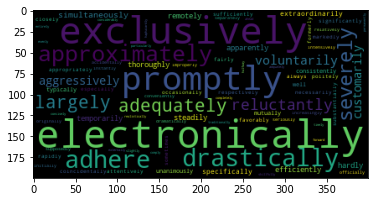

In [42]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡

In [43]:
#@markdown 📌 Exclude short words from your word cloud.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

253


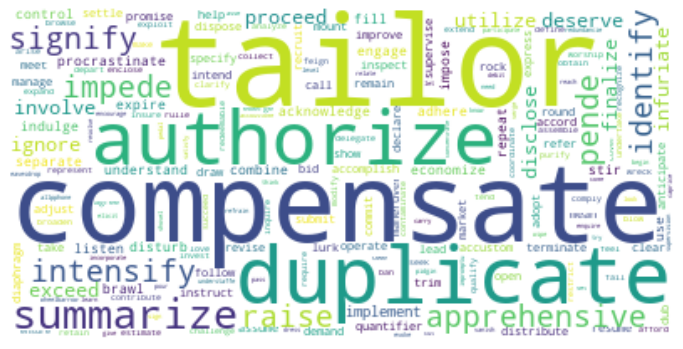

In [44]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')